In [1]:
import os
import csv
import sys
import random
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import roc_auc_score

%matplotlib inline

In [2]:
ll ../results

total 1296
-rw-r--r--  1 npt2105  staff  660500 Apr 12 16:13 final-bydrug_222_24_25_1e-06.csv


In [3]:
resultspath = '../results/final-bydrug_222_24_25_1e-06.csv'
res = pd.read_csv(resultspath, header=None)
res.head()

,0,1
0,6.778939,0.000000
1,5.453893,0.000000
2,5.073052,2.026134
3,3.338184,0.093472
4,0.000000,4.393036


In [4]:
datapath = '../data/clinical_bert_reference_set.txt'
df = pd.read_csv(datapath)
df.head()

,drug,llt_id,llt,class,string
0,Cimzia,35104113,pancytopenia,is_event,"pancytopenia arthralgia (6% cimzia, 4% placebo..."
1,Cimzia,35104746,lymphadenopathy,is_event,"lymphadenopathy and arthralgia (6% cimzia, 4% ..."
2,Cimzia,35104868,leukopenia,is_event,"leukopenia patients, and arthralgia (6% cimzia..."
3,Cimzia,35122651,anemia,is_event,"anemia placebo-treated patients, and arthralgi..."
4,Cimzia,35122884,cytopenia,not_event,"cytopenia (6% cimzia, 4% placebo). other adver..."


In [6]:
np_random_seed = int(resultspath.split('_')[1])
random_state = int(resultspath.split('_')[2])
EPOCHS = int(resultspath.split('_')[3])
LR = resultspath.split('_')[4].split('.')[0]

print(f" np_random_seed: {np_random_seed}")
print(f" random_state: {random_state}")
print(f" EPOCHS: {EPOCHS}")
print(f" LR: {LR}")

 np_random_seed: 222
 random_state: 24
 EPOCHS: 25
 LR: 1e-06


In [7]:
labels = {'not_event': 0, 'is_event': 1}

In [8]:
druglist = sorted(set(df['drug']))

random.seed(np_random_seed)
random.shuffle(druglist)

drugs_train, drugs_val, drugs_test = np.split(druglist, [int(0.8*len(druglist)), int(0.9*len(druglist))])

len(drugs_train), len(drugs_val), len(drugs_test)

df_train = df[df['drug'].isin(drugs_train)]
df_val = df[df['drug'].isin(drugs_val)]
df_test = df[df['drug'].isin(drugs_test)]

df_train.shape, df_val.shape, df_test.shape

((88369, 5), (11818, 5), (13210, 5))

In [9]:
test_y = [labels[l] for l in df_test['class']]
len(test_y), sum(test_y)

(13210, 1701)

In [10]:
auroc = roc_auc_score(test_y, res[1])
auroc

0.9705472429137966

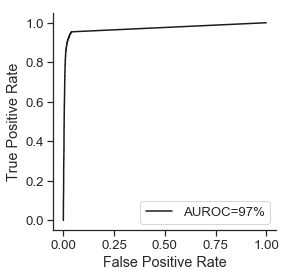

In [11]:
sns.set(style='ticks', font_scale=1.2)
plt.figure(figsize=(4,4))
fpr, tpr, thresholds = metrics.roc_curve(test_y, res[1])
plt.plot(fpr, tpr, 'k-', label='AUROC=%.0f%%' % (100*auroc))
# plt.ylim(0, 1)
# plt.xlim(0, 1)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
sns.despine()

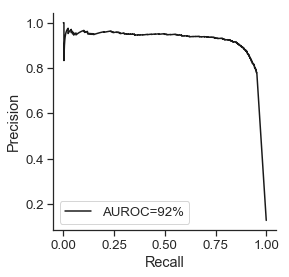

In [12]:
sns.set(style='ticks', font_scale=1.2)
plt.figure(figsize=(4,4))
precision, recall, thresholds = metrics.precision_recall_curve(test_y, res[1])
plt.plot(recall, precision, 'k-', label='AUROC=%.0f%%' % (100*metrics.auc(recall, precision)))
# plt.ylim(0, 1)
# plt.xlim(0, 1)
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.legend()
sns.despine()

In [13]:
df_test['Pred0'] = res[0].to_numpy()
df_test['Pred1'] = res[1].to_numpy()
df_test['PredEvent'] = (df_test['Pred1'] > df_test['Pred0'])

/usr/local/Cellar/ipython/7.3.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/Cellar/ipython/7.3.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/Cellar/ipython/7.3.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [17]:
df_test.head(10)

,drug,llt_id,llt,class,string,Pred0,Pred1,PredEvent
3250,NULOJIX,1198072,dehiscence,not_event,dehiscence 11 psychiatric disorders insomnia 1...,6.778939,0.000000,False
3251,NULOJIX,35104245,lymphoproliferative disorder,not_event,lymphoproliferative disorder patients who disc...,5.453893,0.000000,False
3252,NULOJIX,35104245,lymphoproliferative disorder,not_event,lymphoproliferative disorder reported cases of...,5.073052,2.026134,False
3253,NULOJIX,35104762,lymphocele,is_event,lymphocele are listed below: immune system dis...,3.338184,0.093472,False
3254,NULOJIX,35104868,leukopenia,is_event,leukopenia other malignancies [see boxed warni...,0.000000,4.393036,True
3255,NULOJIX,35104868,leukopenia,is_event,leukopenia adverse reaction rates observed can...,0.000000,5.586792,True
3256,NULOJIX,35104868,leukopenia,is_event,leukopenia abdominal pain 19 16 abdominal pain...,0.000000,4.945965,True
3257,NULOJIX,35104883,neutropenia,is_event,neutropenia selected adverse reactions occurri...,0.000000,5.627717,True
3258,NULOJIX,35122651,anemia,is_event,anemia 6 adverse reactions the most serious ad...,0.000000,4.845898,True
3259,NULOJIX,35122651,anemia,is_event,anemia from the united states and 75% from oth...,0.000000,5.889769,True


In [18]:
df_test['PredEvent'].sum(), sum(test_y)

(1701, 1701)

In [19]:
pd.crosstab(index=df_test['class'], columns=df_test['PredEvent'])

PredEvent,False,True
class,,
is_event,189,1512
not_event,11320,189


## Label by label analysis

In [21]:
drugs = set(df_test['drug'])
len(drugs), drugs

(20,
 {'ARZERRA',
  'Afinitor',
  'Amyvid',
  'BOSULIF',
  'BRILINTA',
  'Brintellix',
  'CAPRELSA',
  'Esbriet',
  'FERRIPROX',
  'Harvoni',
  'INVOKANA',
  'MOVANTIK',
  'NUCYNTA',
  'NULOJIX',
  'Natroba',
  'OPSUMIT',
  'Ofev',
  'XIAFLEX',
  'Xofigo',
  'Zytiga'})

In [24]:
df_test[df_test['drug'] == 'ARZERRA']

,drug,llt_id,llt,class,string,Pred0,Pred1,PredEvent
40800,ARZERRA,35104852,granulocytosis,not_event,granulocytosis 8 [3% were grade 3 or greater])...,4.912546,1.520446,False
40801,ARZERRA,35104868,leukopenia,is_event,leukopenia reactions with >=5% incidence in pa...,0.000000,5.666924,True
40802,ARZERRA,35104868,leukopenia,is_event,"leukopenia pyrexia, rash, and urticaria. b inc...",0.000000,5.555223,True
40803,ARZERRA,35104871,lymphopenia,is_event,"lymphopenia virus infection, genital herpes, a...",0.000000,5.429383,True
40804,ARZERRA,35104874,agranulocytosis,is_event,agranulocytosis day 8 [3% were grade 3 or grea...,0.000000,5.817184,True
40805,ARZERRA,35104883,neutropenia,is_event,neutropenia and precautions (5.1)] * hepatitis...,0.000000,4.944968,True
40806,ARZERRA,35104883,neutropenia,is_event,neutropenia (table 3). refractory cll: the mos...,0.000000,5.382939,True
40807,ARZERRA,35104883,neutropenia,is_event,"neutropenia , pneumonia, pyrexia, cough, diarr...",0.000000,5.937721,True
40808,ARZERRA,35104883,neutropenia,is_event,"neutropenia , and pyrexia. infections were the...",0.000000,6.173783,True
40809,ARZERRA,35104883,neutropenia,is_event,neutropenia . ( 6 ) * refractory cll: common a...,0.000000,5.719499,True
